<a href="https://colab.research.google.com/github/seungchanLLee/DAP__/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Libraries
import pandas as pd
import numpy as np
import re
import os
import string
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import STOPWORDS as stopwords_wc
from statsmodels.tsa.stattools import adfuller

In [7]:
#트윗들
tweets = pd.read_csv("https://raw.githubusercontent.com/seungchanLLee/DAP__/main/temp.csv")
tweets = tweets[["id", "date", "time", "username", 
                 "tweet", "mentions", "urls", "photos", "replies_count", 
                 "retweets_count", "likes_count", "hashtags", "link"]]

tweets["year"] = tweets["date"].apply(lambda x: x.split("-")[0])

#도지코인
dogecoin = pd.read_csv("https://raw.githubusercontent.com/seungchanLLee/DAP__/main/DOGE-USD.csv")

#가장 최근 도지코인
doge_df = pd.read_csv("https://raw.githubusercontent.com/seungchanLLee/DAP__/main/DOGE-USD_the%20latest.csv")

#미국 정부 부채
GFDEBTN = pd.read_csv("https://raw.githubusercontent.com/seungchanLLee/DAP__/main/GFDEBTN.csv")

#미국 금리
DFF = pd.read_csv("https://raw.githubusercontent.com/seungchanLLee/DAP__/main/DFF.csv")


#주제: 💰**Dogecoin on RAPIDS and Elon Musk's Tweets**

<img src="https://raw.githubusercontent.com/seungchanLLee/DAP__/main/title.jpg" height="400" width="800" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto"></img>



##목차

1. 일론 머스크와 트위터


2. 도지코인과 일론 머스크의 트윗의 상관관계


3. 왜 일론 머스크는 암호화폐를 좋아할까?


4. 최근 일론 머스크와 도지코인 근황


#1. 일론 머스크와 트위터

*일론머스크가 본격적으로 트윗을 한 시기는 2015년이다.2015년 테슬라의 가정용 충전 배터리 파워월을 발표하고 그의 사생활을 공개함으로써 슈퍼스타가 된 해이다*.

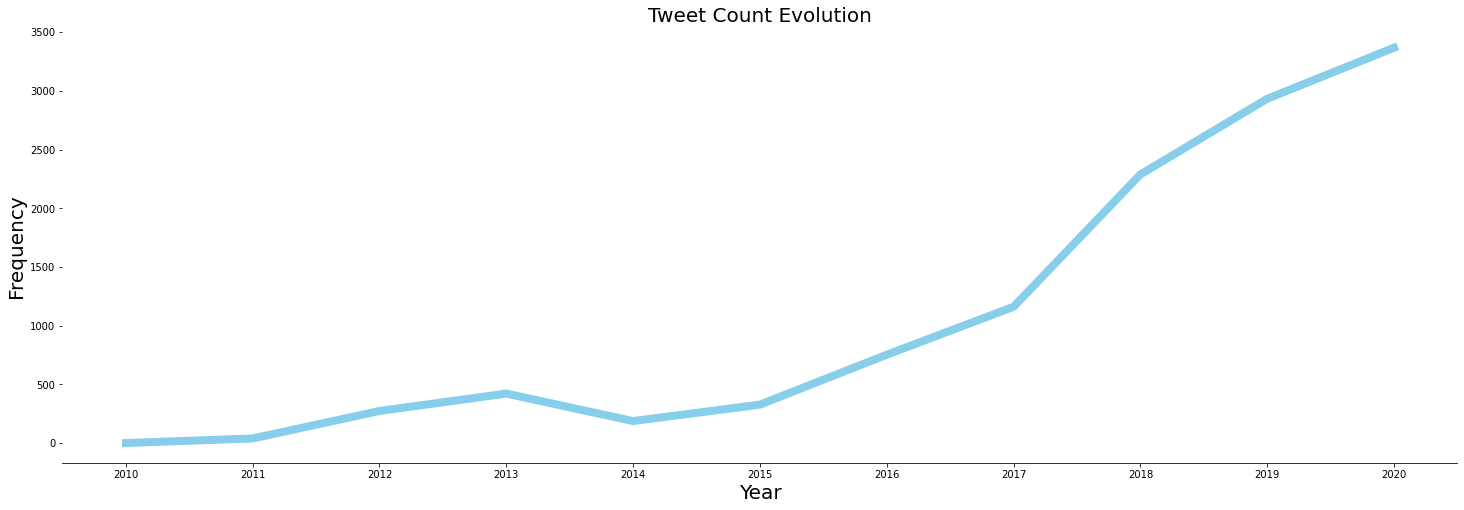

In [ ]:
date_count_df = tweets[tweets["year"]!="2021"].groupby("year")["tweet"].count().reset_index()

plt.figure(figsize=(25, 8))
ax = sns.lineplot(data=date_count_df, x="year", y="tweet", lw=8, color="skyblue")
plt.title("Tweet Count Evolution", size=20)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
sns.despine(left=True);

#2. 도지코인과 일론 머스크의 트윗의 상관관계

*도지코인은 2013년 당시 온라인에서 인기인 시바견 밈을 딴 암호화폐이다. 이 코인을 만든 유일한 목적은 그냥 심심해서라고 알려져 있고 무한정 만들 수 있다는 것이 비트코인과 큰 차이점을 보인다. 2원에 불과한 도지코인은 일론 머스크가 언급할 때마다 가격이 치솟고 거래량이 급증해 최고가 991원을 기록했다.(한국 거래소 기준 - 현재는 222원)*

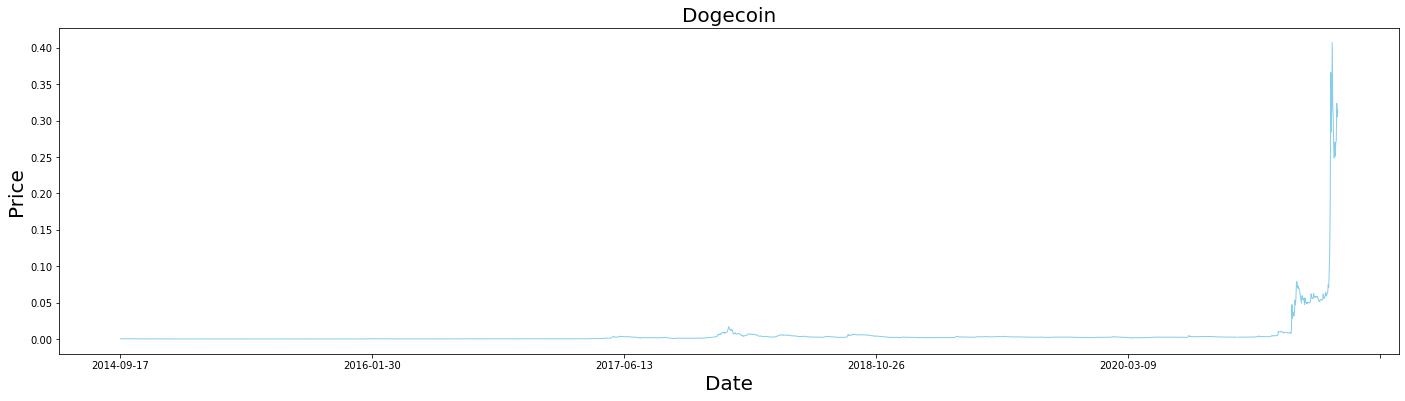

In [21]:
plt.figure(figsize = (24,6))
dogecoin.groupby('Date')['Close'].mean().plot(color='skyblue', lw=1);
plt.title("Dogecoin", size=20)
plt.xlabel('Date', size=20);
plt.ylabel('Price', size=20);

##머스크의 도지코인 관련 트윗 정리

In [5]:
# Get bitcoin info
dgc_tweets = tweets[tweets["tweet"].str.contains("Doge")].reset_index(drop = True)
# Convert date to number
dgc_tweets["date"] = dgc_tweets["date"].apply(lambda x: datetime.fromisoformat(x).timestamp())
timestamps = dgc_tweets["date"]

dgc_prices = dogecoin.sort_values("Date", ascending=False).head(800)
dgc_prices["Date"] = dgc_prices["Date"].apply(lambda x: datetime.fromisoformat(x).timestamp())

for k, tweet in enumerate(dgc_tweets["tweet"]): print(color.BOLD + f"{k+1}." + color.END, tweet)


1. SpaceX is going to put a literal Dogecoin on the literal moon
2. @lexfridman Sometimes it’s about Doge
3. @beeple 420M Doge
4. Origin of Doge Day Afternoon: The ancient Romans sacrificed a Dogecoin at the beginning of the Doge Days to appease the rage of Sirius, believing that the star was the cause of the hot, sultry weather.
5. Doge day afternoon
6. Doge spelled backwards is Egod
7. @WootiezTV Very much so &amp; its leader shall be The Doge   https://t.co/VXmuW5c0y9
8. @draecomino 2022: Dogecoin is dumb
9. Doge meme shield (legendary item)  https://t.co/CeomU9q84c
10. Dojo 4 Doge
11. @dogecoin I just set up some little Doge mining rigs with my kids. It was fun.
12. @RationalEtienne An acceptable percentage. Doge is much more concentrated.
13. If major Dogecoin holders sell most of their coins, it will get my full support. Too much concentration is the only real issue imo.
14. @gtera27 Doge is underestimated
15. Bought some Dogecoin for lil X, so he can be a toddler hodler
16. @its

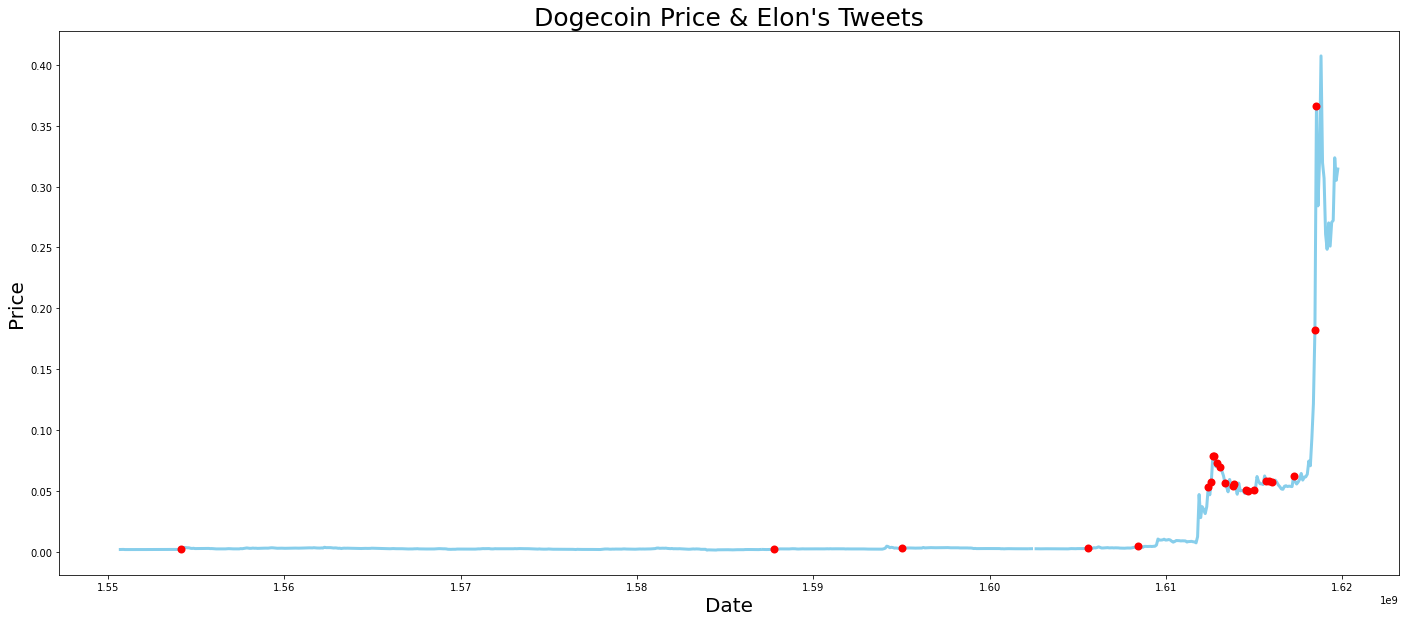

In [23]:
# Get intersection
x_values = dgc_prices[dgc_prices["Date"].isin(timestamps)]["Date"]
y_values = dgc_prices[dgc_prices["Date"].isin(timestamps)]["Adj Close"]

# Plot
plt.figure(figsize = (24, 10))
for x, y in zip(x_values, y_values):
    plt.scatter(x, y, color="r", lw=2, zorder=2)
plt.plot(dgc_prices["Date"], dgc_prices["Adj Close"], color='skyblue', lw=3, zorder=1)
plt.title("Dogecoin Price & Elon's Tweets", size=25)
plt.xlabel("Date", size=20)
plt.ylabel("Price", size=20);

###요약하자면 근본없는 2원짜리 코인이라 긴기민가하다가 
<img src="https://raw.githubusercontent.com/seungchanLLee/DAP__/main/rocket.png" height="500" width="600"></img>
###4월 15일에 이거 맞고 그대로 달까지 가버림


#3. 왜 일론 머스크는 암호화폐를 좋아할까?

## ● 유동성

테슬라는 비트코인 투자 이유에 대해 "현금 수익을 극대화하고 유연성을 확보하기 위해서"라고 밝혔다. 저금리로 현금을 굴릴 곳이 마땅치 않고 가치가 급등하고 유동성이 높은 비트코인이 투자 대안이 될 수 있다고 말했다.

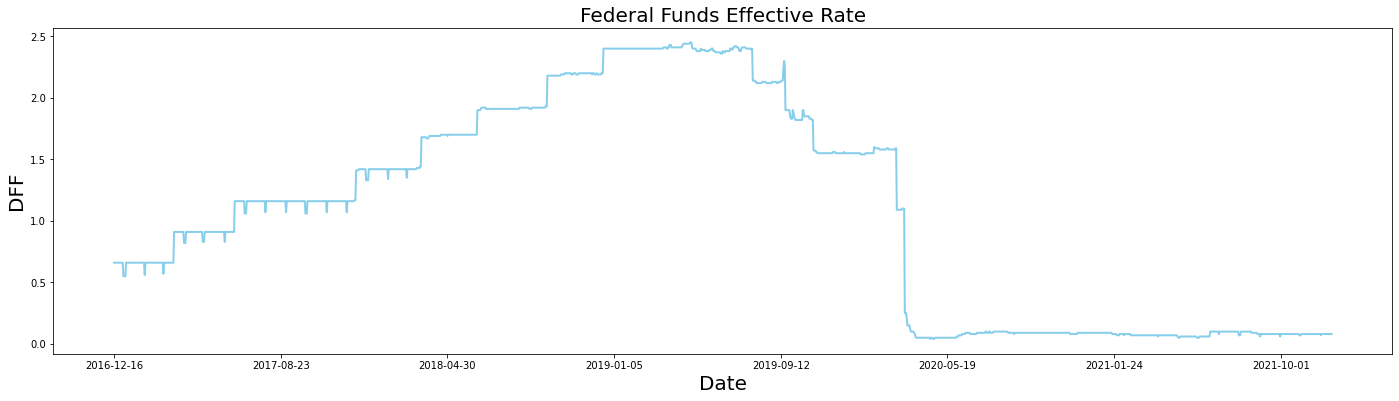

In [24]:
plt.figure(figsize = (24,6))
DFF.groupby('DATE')['DFF'].mean().plot(color='skyblue', lw=2);
plt.title("Federal Funds Effective Rate", size=20)
plt.xlabel('Date', size=20);
plt.ylabel('DFF', size=20);

##● 탈중앙화 -> 정치적 리스크 대비

2008년 금융 위기로 인한 경기 침체이후 각 정부는 저성장에 활기를 주기 위해서 돈을 마구 찍어냄 -> 돈의 가치가 떨어지고 돈을 대체할 수 있는 자산들의 가치가 더 올라감 -> 빈부격차 심해짐 -> 기존 금융 권력에 대한 박탈감과 저항감 -> 암호화폐 버블

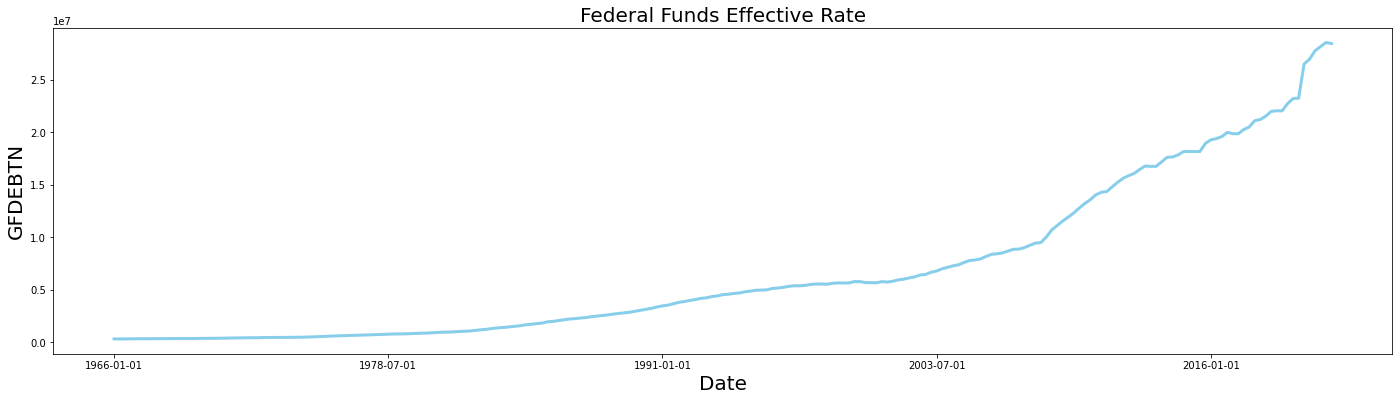

In [27]:
plt.figure(figsize = (24,6))
GFDEBTN.groupby('DATE')['GFDEBTN'].mean().plot(color='skyblue', lw=3);
plt.title("Federal Funds Effective Rate", size=20)
plt.xlabel('Date', size=20);
plt.ylabel('GFDEBTN', size=20);

기존 금융 시스템으로 부터 벗어난 다는 것은 전 세계 수십 개 국가에 들어가 있는 글로벌 기업들이 해외 투자를 할때 정치적인 리스크를 조금 줄일 수 있다. 수십 개의 나라에 투자를 하고 있는 상황에서는 어디서 문제가 터질지 그 누구도 예측할 수 없다 보니까 일종의 보험 역할을 할 수 있다.

##● 인기 상승 -> 노이즈 마케팅

일론 머스크는 이전에도 공매도 세력은 비정상적인 시장권력이라는 트윗들을 많이 올렸다. 이런 스토리들이 일론 머스크를 기득권에 대한 저항의 아이콘 이미지를 만들어 주었다. 일론 머스크의 충성도가 테슬라로 전이 되면서 브랜드 이미지를 강화하는 효과를 보고있다.
<br><br>
비트코인으로 테슬라 결제 승인 -> 테슬라 홍보<br>
달 탐사 프로젝트 비용을 도지코인으로 받겟다 -> 스페이스X 홍보

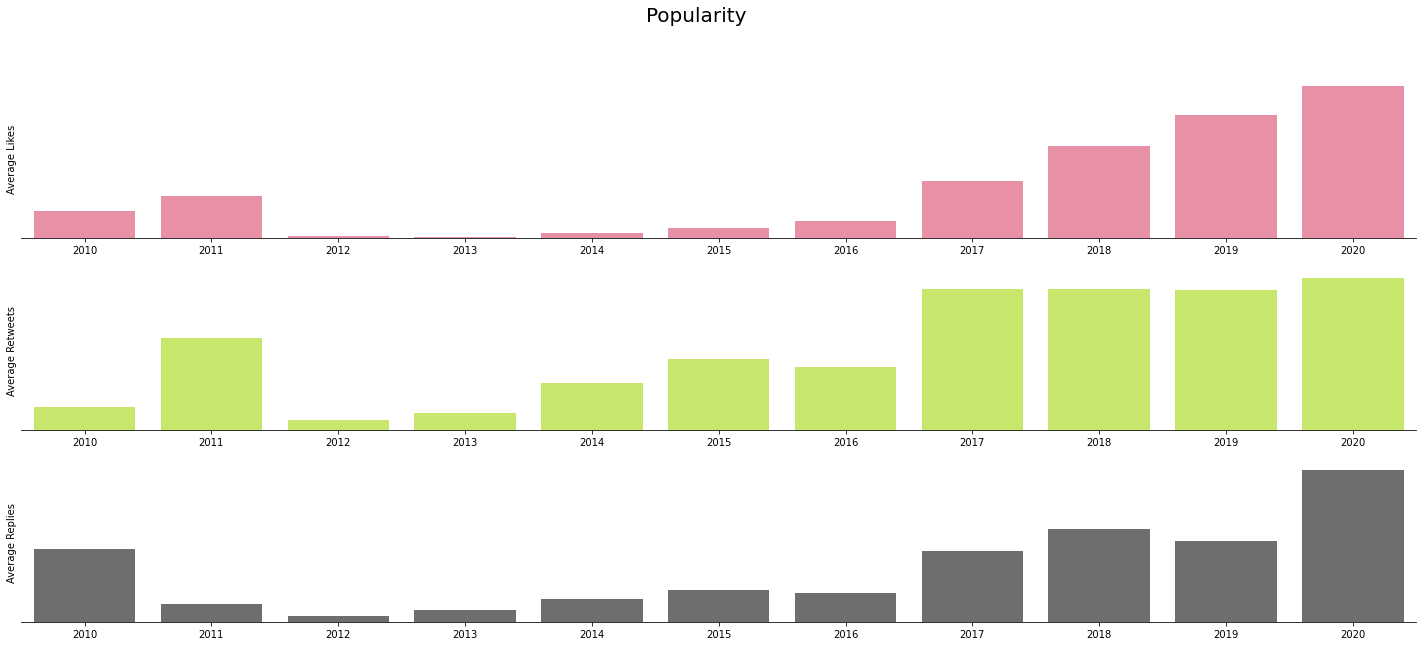

In [26]:
# Get Popularity Information
popularity = ["likes_count", "retweets_count", "replies_count"]
popularity_df = tweets[tweets["year"]!="2021"].groupby("year").agg({popularity[0] : 'sum',
                                                                    popularity[1] : 'sum',
                                                                    popularity[2] : 'sum',
                                                                    'tweet' : 'count'}).reset_index()
popularity_df["likes_count"] = popularity_df["likes_count"]/popularity_df["tweet"]
popularity_df["retweets_count"] = popularity_df["retweets_count"]/popularity_df["tweet"]
popularity_df["replies_count"] = popularity_df["replies_count"]/popularity_df["tweet"]


fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(25, 10))
axs = [ax1, ax2, ax3]
plt.suptitle("Popularity", size=20)
sns.barplot(data=popularity_df, x="year", y="likes_count", lw=5, color="#F7819F", ax=ax1)
sns.barplot(data=popularity_df, x="year", y="retweets_count", lw=5, color="#D0FA58", ax=ax2)
sns.barplot(data=popularity_df, x="year", y="replies_count", lw=5, color="#6E6E6E", ax=ax3)
names = ["Average Likes", "Average Retweets", "Average Replies"]
for ax, n in zip(axs, names):
    ax.set_xlabel("", size=10)
    ax.set_ylabel(n, size=10)
    ax.get_yaxis().set_ticks([])
#     ax.title.set_text(n)
sns.despine(left=True);

#4. 최근 일론 머스크와 도지코인 근황

##2021년 타임지 올해의 인물 일론 머스크

<img src="https://raw.githubusercontent.com/seungchanLLee/DAP__/main/TIME.png"></img>